In [ ]:
#Imports básicos + connect MySQL

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

#PREENCHA COM SEUS DADOS MYSQL ANTES DE UTILIZAR!!!
conn = mysql.connector.connect(
    host=" ",
    user=" ",     
    password=" ",   
    database="Loja_TechMais"
)

print("Connect Check!!")



Connect Check!!


In [17]:
#Entendendo o formato de cada tabela, seguindo a ordem: Clientes, Produtos e Vendas

df_clientes = pd.read_sql("SELECT * FROM Clientes;", conn)
df_produtos = pd.read_sql("SELECT * FROM Produtos;", conn)
df_vendas = pd.read_sql("SELECT * FROM Vendas;", conn)

print("Clientes:")
display(df_clientes.head())

print("Produtos:")
display(df_produtos.head())

print("Vendas:")
display(df_vendas.head())


Clientes:


/tmp/ipykernel_30570/3078615052.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clientes = pd.read_sql("SELECT * FROM Clientes;", conn)
/tmp/ipykernel_30570/3078615052.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_produtos = pd.read_sql("SELECT * FROM Produtos;", conn)
/tmp/ipykernel_30570/3078615052.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vendas = pd.read_sql("SELECT * FROM Vendas;", conn)


,CustomerID,CustomerName,Region,Email
0,101,Lucas Silva,Sudeste,lucas.silva@email.com
1,102,Ana Costa,Sul,ana.costa@email.com
2,103,João Pereira,Nordeste,joao.pereira@email.com
3,104,Maria Souza,Sudeste,maria.souza@email.com
4,105,Pedro Lima,Centro-Oeste,pedro.lima@email.com


Produtos:


,ProductID,ProductName,Category,UnitPrice
0,201,Notebook,Eletrônicos,3500.0
1,202,Smartphone,Eletrônicos,2200.0
2,203,Monitor,Eletrônicos,900.0
3,204,Teclado,Periféricos,150.0
4,205,Mouse,Periféricos,80.0


Vendas:


,OrderID,CustomerID,ProductID,OrderDate,Quantity
0,1,101,201,2025-01-15,2
1,2,102,202,2025-01-20,1
2,3,101,205,2025-02-05,3
3,4,103,203,2025-02-12,2
4,5,104,204,2025-03-01,5


In [ ]:
#Query para criação de uma tabela unica com dados que precisamos para gerar análises
#Trazendo os as colunas de cada tabela usando suas iniciais, v(vendas), c(clientes) e p(produtos)
#A ideia é simplificar para focar no trabalho de análise

query = """
SELECT v.OrderID, v.CustomerID, c.CustomerName, c.Region,
       v.ProductID, p.ProductName, p.Category, v.Quantity, p.UnitPrice,
       (v.Quantity * p.UnitPrice) AS Total,
       v.OrderDate
FROM Vendas v
JOIN Clientes c ON v.CustomerID = c.CustomerID
JOIN Produtos p ON v.ProductID = p.ProductID;
"""

df_tabela_cheia = pd.read_sql(query, conn) #Rodar a query e gerar o dataframe que será utilizado
df_tabela_cheia["OrderDate"] = pd.to_datetime(df_tabela_cheia["OrderDate"]) #to_datetime para o pandas manipular a data

display(df_tabela_cheia.head())


/tmp/ipykernel_30570/1646000638.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tabela_cheia = pd.read_sql(query, conn) #Rodar a query e gerar o dataframe que será utilizado


,OrderID,CustomerID,CustomerName,Region,ProductID,ProductName,Category,Quantity,UnitPrice,Total,OrderDate
0,1,101,Lucas Silva,Sudeste,201,Notebook,Eletrônicos,2,3500.0,7000.0,2025-01-15
1,8,106,Carla Rocha,Sul,201,Notebook,Eletrônicos,1,3500.0,3500.0,2025-04-10
2,12,105,Pedro Lima,Centro-Oeste,201,Notebook,Eletrônicos,1,3500.0,3500.0,2025-05-20
3,16,111,Rafael Costa,Sudeste,201,Notebook,Eletrônicos,1,3500.0,3500.0,2025-06-20
4,20,104,Maria Souza,Sudeste,201,Notebook,Eletrônicos,1,3500.0,3500.0,2025-07-15


In [ ]:
#MÉTRICA 1:
#Análise de quais clientes geraram mais receita total

receita_cliente = df_tabela_cheia.groupby("CustomerName")["Total"].sum().reset_index() #GROUP BY simples por nome
receita_cliente = receita_cliente.rename(columns={"Total": "Receita Total"}) #Renomeando para ficar apresentável
receita_cliente = receita_cliente.sort_values(by="Receita Total", ascending=False) #Ordenando por quem mais gerou receita

display(receita_cliente)


,CustomerName,Receita Total
6,Lucas Silva,10790.0
1,Carla Rocha,8500.0
7,Marcos Oliveira,7450.0
11,Rafael Costa,5700.0
10,Pedro Lima,5040.0
8,Maria Souza,4410.0
5,Lucas Martins,4000.0
0,Ana Costa,3400.0
3,João Pereira,2200.0
9,Patricia Lima,1800.0


In [ ]:
#MÉTRICA 2:
#Analisando a ordem de produtos mais vendidos e suas quantidades

produtos_mais_vendidos = df_tabela_cheia.groupby("ProductName")["Quantity"].sum().reset_index() #GROUP BY pelo nome do produto
produtos_mais_vendidos = produtos_mais_vendidos.rename(columns={"Quantity": "Quantidade Vendida"}) #Rename para ficar apresentável
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by="Quantidade Vendida", ascending=False) #Ordenando por quantidade de vendas

display(produtos_mais_vendidos)


,ProductName,Quantidade Vendida
1,Mouse,24
4,Teclado,24
0,Monitor,10
2,Notebook,8
3,Smartphone,6


In [ ]:
#MÉTRICA 3:
#Análise de regiões com mais receita gerada

receita_regiao = df_tabela_cheia.groupby("Region")["Total"].sum().reset_index() #GROUP BY de acordo com a coluna região
receita_regiao = receita_regiao.rename(columns={"Total": "Receita Total"}) #Rename para ficar apresentável
receita_regiao = receita_regiao.sort_values(by="Receita Total", ascending=False) #Ordenando as regiões com mais receita 

display(receita_regiao)


,Region,Receita Total
2,Sudeste,22400.0
3,Sul,19350.0
1,Nordeste,8000.0
0,Centro-Oeste,5970.0


In [ ]:
#MÉTRICA 4:
#Mês a Mês de vendas e a receita de cada qual

vendas_por_mes = df_tabela_cheia.groupby(df_tabela_cheia["OrderDate"].dt.to_period("M"))["Total"].sum().reset_index() #GROUP BY e ordenação por mês na ordem natural do ano
vendas_por_mes = vendas_por_mes.rename(columns={"OrderDate": "Mês", "Total": "Receita Total"}) #Renoemando para ficar apresentável
display(vendas_por_mes)


,Mês,Receita Total
0,2025-01,9200.0
1,2025-02,2040.0
2,2025-03,2290.0
3,2025-04,5700.0
4,2025-05,5900.0
5,2025-06,8830.0
6,2025-07,8350.0
7,2025-08,10850.0
8,2025-09,2560.0


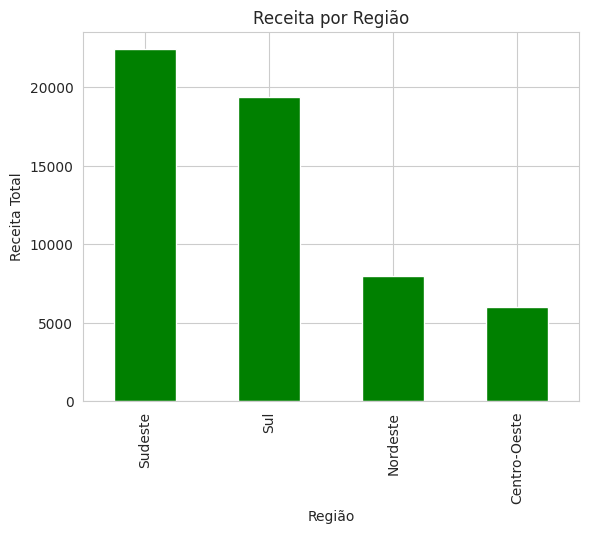

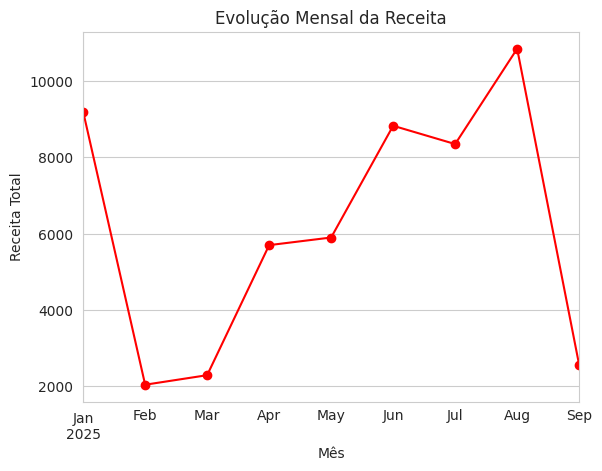

In [39]:
#Gerando gráficos para análise dos dados através de plot

#Receita por Região
receita_regiao.plot(kind="bar", x="Region", y="Receita Total", color="green", legend=False, title="Receita por Região") #Descrição base do gráfico
plt.ylabel("Receita Total") #Legenda Y
plt.xlabel("Região") #Legenda X
plt.show()

#Evolução Mensal da Receita
vendas_por_mes.plot(kind="line", x="Mês", y="Receita Total", marker='o', color="red", legend=False, title="Evolução Mensal da Receita") #Descrição base do gráfico
plt.ylabel("Receita Total") #Legenda Y
plt.xlabel("Mês") #Legenda X
plt.grid(True)
plt.show()
